### Import libraries

In [2]:
# !pip install stable-baselines

In [8]:
import time
from stable_baselines.common.atari_wrappers import make_atari
from stable_baselines.common.cmd_util import make_atari_env
from stable_baselines.common.vec_env import VecFrameStack
from stable_baselines.common.policies import MlpPolicy, CnnPolicy, MlpLstmPolicy, MlpLnLstmPolicy, CnnLstmPolicy
from stable_baselines.common import make_vec_env
from stable_baselines import PPO2
from matplotlib import animation
import matplotlib.pyplot as plt

In [3]:
basePath = '/home/marianna/Documentos/01-semesters-unicamp/02-second-semester-unicamp/03-reinforcement-learning/03-projects-rl/02-project02-rl/02-codes/03-experiments_models/models/'

baselinePath = basePath+'01-image_models/ppo2_freeway_baseline.pkl'
baselineGamma75Path = basePath+'01-image_models/ppo2_freeway_exp01_gamma_75.pkl'
baselineStack64Path = basePath+'01-image_models/ppo2_freeway_baseline_stack_64.pkl'
baselineRAMPath = basePath+'02-ram_models/ppo2_freeway_ram_baseline_mlp.pkl'
baseline1MPath = basePath+'01-image_models/ppo2_baseline_1M.pkl'

In [10]:
# From https://gist.github.com/botforge/64cbb71780e6208172bbf03cd9293553
def _save_frames_as_gif(frames, path='./', filename='gym_animation.gif'):
    #Mess with this to change frame size
    plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi=72)

    patch = plt.imshow(frames[0])
    plt.axis('off')

    def animate(i):
        patch.set_data(frames[i])

    anim = animation.FuncAnimation(plt.gcf(), animate, frames = len(frames), interval=50)
    anim.save(path + filename, writer='imagemagick', fps=60)
    print("saved model at "+path+filename)
    

def generate_gif(fn,freeway,model):
    
    env = make_atari_env('FreewayNoFrameskip-v0', num_env=1, seed=0)
    env = VecFrameStack(env, n_stack=4)
    model = model.load(freeway)
    frames = []
    FRAME_FREQ = 2
    obs = env.reset()
    for t in range(50000):
        if t % FRAME_FREQ == 0:
            frames.append(env.render(mode="rgb_array"))
        action, _states = model.predict(obs,env)
        obs, rewards, dones, info = env.step(action)
        if dones:
            break
    # you must have a folder gif no directory
    _save_frames_as_gif(frames=frames, path='./gif/', filename=fn+'.gif')

### 1. Baseline

In [5]:
baseline_model = PPO2.load(baselinePath)

/home/marianna/anaconda3/lib/python3.7/site-packages/cloudpickle/cloudpickle.py:704: UserWarning: A pickle file created using an old (<=1.4.1) version of cloudpicke is currently being loaded. This is not supported by cloudpickle and will break in cloudpickle 1.7
  "will break in cloudpickle 1.7", category=UserWarning


Loading a model without an environment, this model cannot be trained until it has a valid environment.


In [6]:
# env = make_atari_env('FreewayNoFrameskip-v0', seed=42, num_env=1)
# env = VecFrameStack(env, n_stack=4)

# obs = env.reset()
# dones = False
# while not dones:
#     action, _states = baseline_model.predict(obs)
#     obs, rewards, dones, info = env.step(action)
#     env.render()

In [7]:
# env.close()


Loading a model without an environment, this model cannot be trained until it has a valid environment.




/home/marianna/anaconda3/lib/python3.7/site-packages/cloudpickle/cloudpickle.py:704: UserWarning: A pickle file created using an old (<=1.4.1) version of cloudpicke is currently being loaded. This is not supported by cloudpickle and will break in cloudpickle 1.7
  "will break in cloudpickle 1.7", category=UserWarning









Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



saved model at ./gif/ppo_baseline_gif.gif


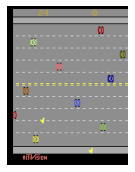

In [11]:
generate_gif("ppo_baseline_gif",baselinePath,PPO2)

### 2. Baseline + gamma 75

In [8]:
baseline_g75_model = PPO2.load(baselineGamma75Path)

/home/marianna/anaconda3/lib/python3.7/site-packages/cloudpickle/cloudpickle.py:704: UserWarning: A pickle file created using an old (<=1.4.1) version of cloudpicke is currently being loaded. This is not supported by cloudpickle and will break in cloudpickle 1.7
  "will break in cloudpickle 1.7", category=UserWarning


Loading a model without an environment, this model cannot be trained until it has a valid environment.


In [11]:
env = make_atari_env('FreewayNoFrameskip-v0', seed=42, num_env=1)
env = VecFrameStack(env, n_stack=4)

obs = env.reset()
dones = False
while not dones:
    action, _states = baseline_g75_model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    env.render()

In [12]:
env.close()

/home/marianna/anaconda3/lib/python3.7/site-packages/cloudpickle/cloudpickle.py:704: UserWarning: A pickle file created using an old (<=1.4.1) version of cloudpicke is currently being loaded. This is not supported by cloudpickle and will break in cloudpickle 1.7
  "will break in cloudpickle 1.7", category=UserWarning


Loading a model without an environment, this model cannot be trained until it has a valid environment.
saved model at ./gif/ppo_gamma_75_gif.gif


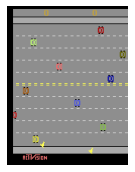

In [12]:
generate_gif("ppo_gamma_75_gif",baselineGamma75Path,PPO2)

### 3. Baseline + stack 64

In [13]:
baseline_s64_model = PPO2.load(baselineStack64Path)

/home/marianna/anaconda3/lib/python3.7/site-packages/cloudpickle/cloudpickle.py:704: UserWarning: A pickle file created using an old (<=1.4.1) version of cloudpicke is currently being loaded. This is not supported by cloudpickle and will break in cloudpickle 1.7
  "will break in cloudpickle 1.7", category=UserWarning


Loading a model without an environment, this model cannot be trained until it has a valid environment.


In [16]:
env = make_atari_env('FreewayNoFrameskip-v0', seed=42, num_env=1)
env = VecFrameStack(env, n_stack=64)

obs = env.reset()
dones = False
while not dones:
    action, _states = baseline_s64_model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    env.render()

In [17]:
env.close()

### 4. Baseline + RAM

In [21]:
baseline_ram_model = PPO2.load(baselineRAMPath)

/home/marianna/anaconda3/lib/python3.7/site-packages/cloudpickle/cloudpickle.py:704: UserWarning: A pickle file created using an old (<=1.4.1) version of cloudpicke is currently being loaded. This is not supported by cloudpickle and will break in cloudpickle 1.7
  "will break in cloudpickle 1.7", category=UserWarning


Loading a model without an environment, this model cannot be trained until it has a valid environment.


In [30]:
env = make_atari('Freeway-ramNoFrameskip-v0')

obs = env.reset()
dones = False
while not dones:
    action, _states = baseline_ram_model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    env.render()
    time.sleep(0.005)

In [31]:
env.close()

### 5. Baseline + 1M timesteps

In [32]:
baseline_1m_model = PPO2.load(baseline1MPath)

/home/marianna/anaconda3/lib/python3.7/site-packages/cloudpickle/cloudpickle.py:704: UserWarning: A pickle file created using an old (<=1.4.1) version of cloudpicke is currently being loaded. This is not supported by cloudpickle and will break in cloudpickle 1.7
  "will break in cloudpickle 1.7", category=UserWarning


Loading a model without an environment, this model cannot be trained until it has a valid environment.


In [37]:
env = make_atari_env('FreewayNoFrameskip-v0', seed=42, num_env=1)
env = VecFrameStack(env, n_stack=4)

obs = env.reset()
dones = False
while not dones:
    action, _states = baseline_1m_model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    env.render()

In [39]:
env.close()

In [ ]:
generate_gif("ppo_baseline_1M_gif",baseline1MPath,PPO2)

/home/marianna/anaconda3/lib/python3.7/site-packages/cloudpickle/cloudpickle.py:704: UserWarning: A pickle file created using an old (<=1.4.1) version of cloudpicke is currently being loaded. This is not supported by cloudpickle and will break in cloudpickle 1.7
  "will break in cloudpickle 1.7", category=UserWarning


Loading a model without an environment, this model cannot be trained until it has a valid environment.
